<a href="https://www.kaggle.com/code/davidecortonesi/eda-and-data-visualization?scriptVersionId=142207273" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sales-orders/sales_data.csv


In [2]:
#CALL THIS DATASET df
df = pd.read_csv("/kaggle/input/sales-orders/sales_data.csv")

In [3]:
#SHOW ME THE STARTING DATASET
df.head()

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950


In [4]:
#RENAME COLUMNS
df.rename(columns={'catégorie': 'Product Classification', 'turnover': 'Turnover', 'margin': 'Margin'}, inplace=True)

In [5]:
#ROUND NUMERICAL COLUMNS TO TWO DECIMAL PLACES
Columns_to_Round_TwoDecimalPlaces = ['Price Each', 'Cost price', 'Turnover', 'Margin']
df[Columns_to_Round_TwoDecimalPlaces] = df[Columns_to_Round_TwoDecimalPlaces].round(2)

In [6]:
# Add 'Total Number of Products Sold' to df
df['Total Number of Products Sold'] = df.groupby('Product')['Product'].transform('count').rename('Total Number of Products Sold')

In [7]:
#SHOW ME THE STARTING DATASET
df.head()

,Order Date,Order ID,Product,Product_ean,Product Classification,Purchase Address,Quantity Ordered,Price Each,Cost price,Turnover,Margin,Total Number of Products Sold
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.00,700.00,469.00,6842
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.48,14.95,7.48,21658
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,6.00,23.98,11.99,18882
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.49,149.99,52.50,7507
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,6.00,11.99,6.00,18882


In [8]:
#SHOW ME THE PERCENTAGE OF NaNs PRESENT IN EACH COLUMN
def missing_data(df):
    total_missing = df.isnull().sum().sort_values(ascending = False)
    Percentage = (total_missing / len(df)) * 100
    summary_df = pd.concat([total_missing, Percentage], axis=1, keys=['Data Missing', 'Data Percentage Missing'])
    return summary_df

missing_data_df = missing_data(df)
missing_data_df.style.background_gradient(cmap='Greys')

,Data Missing,Data Percentage Missing
Order Date,0,0.000000
Order ID,0,0.000000
Product,0,0.000000
Product_ean,0,0.000000
Product Classification,0,0.000000
Purchase Address,0,0.000000
Quantity Ordered,0,0.000000
Price Each,0,0.000000
Cost price,0,0.000000
Turnover,0,0.000000


In [9]:
#I'M CHECKING FOR DUPLICATE ROWS 
Rows_duplicates = df.duplicated().sum()
df = df.drop_duplicates()
print(f"Number of duplicate rows dropped: {Rows_duplicates}")

Number of duplicate rows dropped: 0


In [10]:
#I'M LOOKING FOR TOP 10 PRODUCTS SOLD ORDERED BY THEIR MARGIN
Sorted_df_TopMargin = df.sort_values(by='Margin', ascending=False)
Top10_Products_No_Duplicate = Sorted_df_TopMargin.drop_duplicates(subset='Product').head(10)
Top10_Products_Sold_By_Margin = Top10_Products_No_Duplicate[['Product', 'Margin']]
Top10_Products_Sold_By_Margin

#FIRST I'M CALCULATING THE NUMBER OD SOLD PRODUCTS FOR EACH PRODUCT IN A SORTED DF, THEN I'M GONNA MERGING IT TO THE SORTED DF CALCULATED BEFORE
#Preparing column to merge on sorted df
Product_Counts = df['Product'].value_counts().reset_index()
Product_Counts.columns = ['Product', 'Number of Sold Product']
#Merging Number of Sold Product and create a Total Profit column
Top10_Products_By_Margin_with_counts = Top10_Products_Sold_By_Margin.merge(Product_Counts, on='Product', how='left')
Top10_Products_By_Margin_with_counts['Total Profit'] = Top10_Products_By_Margin_with_counts['Number of Sold Product'] * Top10_Products_By_Margin_with_counts['Margin']
Top10_Products_By_Margin_with_counts

#I KNOW THIS ISN'T THE MOST EFFICENT WAY TO DO THE WORK, I'M JUST DOING IT IN ORDER TO SHOW HOW TO MERGE A DF
Top10_Products_By_Margin_with_counts


,Product,Margin,Number of Sold Product,Total Profit
0,Macbook Pro Laptop,2278.00,4724,10761272.00
1,ThinkPad Laptop,1339.99,4128,5531478.72
2,iPhone,938.00,6842,6417796.00
3,Google Phone,804.00,5525,4442100.00
4,Vareebadd Phone,536.00,2065,1106840.00
5,27in 4K Gaming Monitor,522.59,6230,3255735.70
6,34in Ultrawide Monitor,509.19,6181,3147303.39
7,LG Washing Machine,402.00,666,267732.00
8,LG Dryer,402.00,646,259692.00
9,Flatscreen TV,402.00,4800,1929600.00


In [11]:
#I'M LOOKING FOR TOP 10 PRODUCTS SOLD ORDERED BY NUMBERS OF SOLD PRODUCTS
top_10_products_sold_by_number = df.groupby('Product').size().reset_index(name='Total Number of Products Sold')
top_10_products_sold_by_number = top_10_products_sold_by_number.sort_values(by='Total Number of Products Sold', ascending=False).head(10)
top_10_products_sold_by_number['Margin'] = df.groupby('Product')['Margin'].first().reset_index()['Margin']
top_10_products_sold_by_number = top_10_products_sold_by_number[['Product', 'Margin', 'Total Number of Products Sold']]
top_10_products_sold_by_number['Total Profit'] = top_10_products_sold_by_number['Total Number of Products Sold'] * top_10_products_sold_by_number['Margin']
top_10_products_sold_by_number['Total Profit'] = top_10_products_sold_by_number['Total Profit'].astype('int64')

top_10_products_sold_by_number

,Product,Margin,Total Number of Products Sold,Total Profit
15,USB-C Charging Cable,5.98,21903,130979
12,Lightning Charging Cable,7.48,21658,162001
5,AAA Batteries (4-pack),1.50,20641,30961
4,AA Batteries (4-pack),1.92,20577,39507
17,Wired Headphones,11.99,18882,226395
6,Apple Airpods Headphones,52.50,15549,816322
7,Bose SoundSport Headphones,50.00,13325,666250
2,27in FHD Monitor,52.50,7507,394117
18,iPhone,469.00,6842,3208898
1,27in 4K Gaming Monitor,261.29,6230,1627836


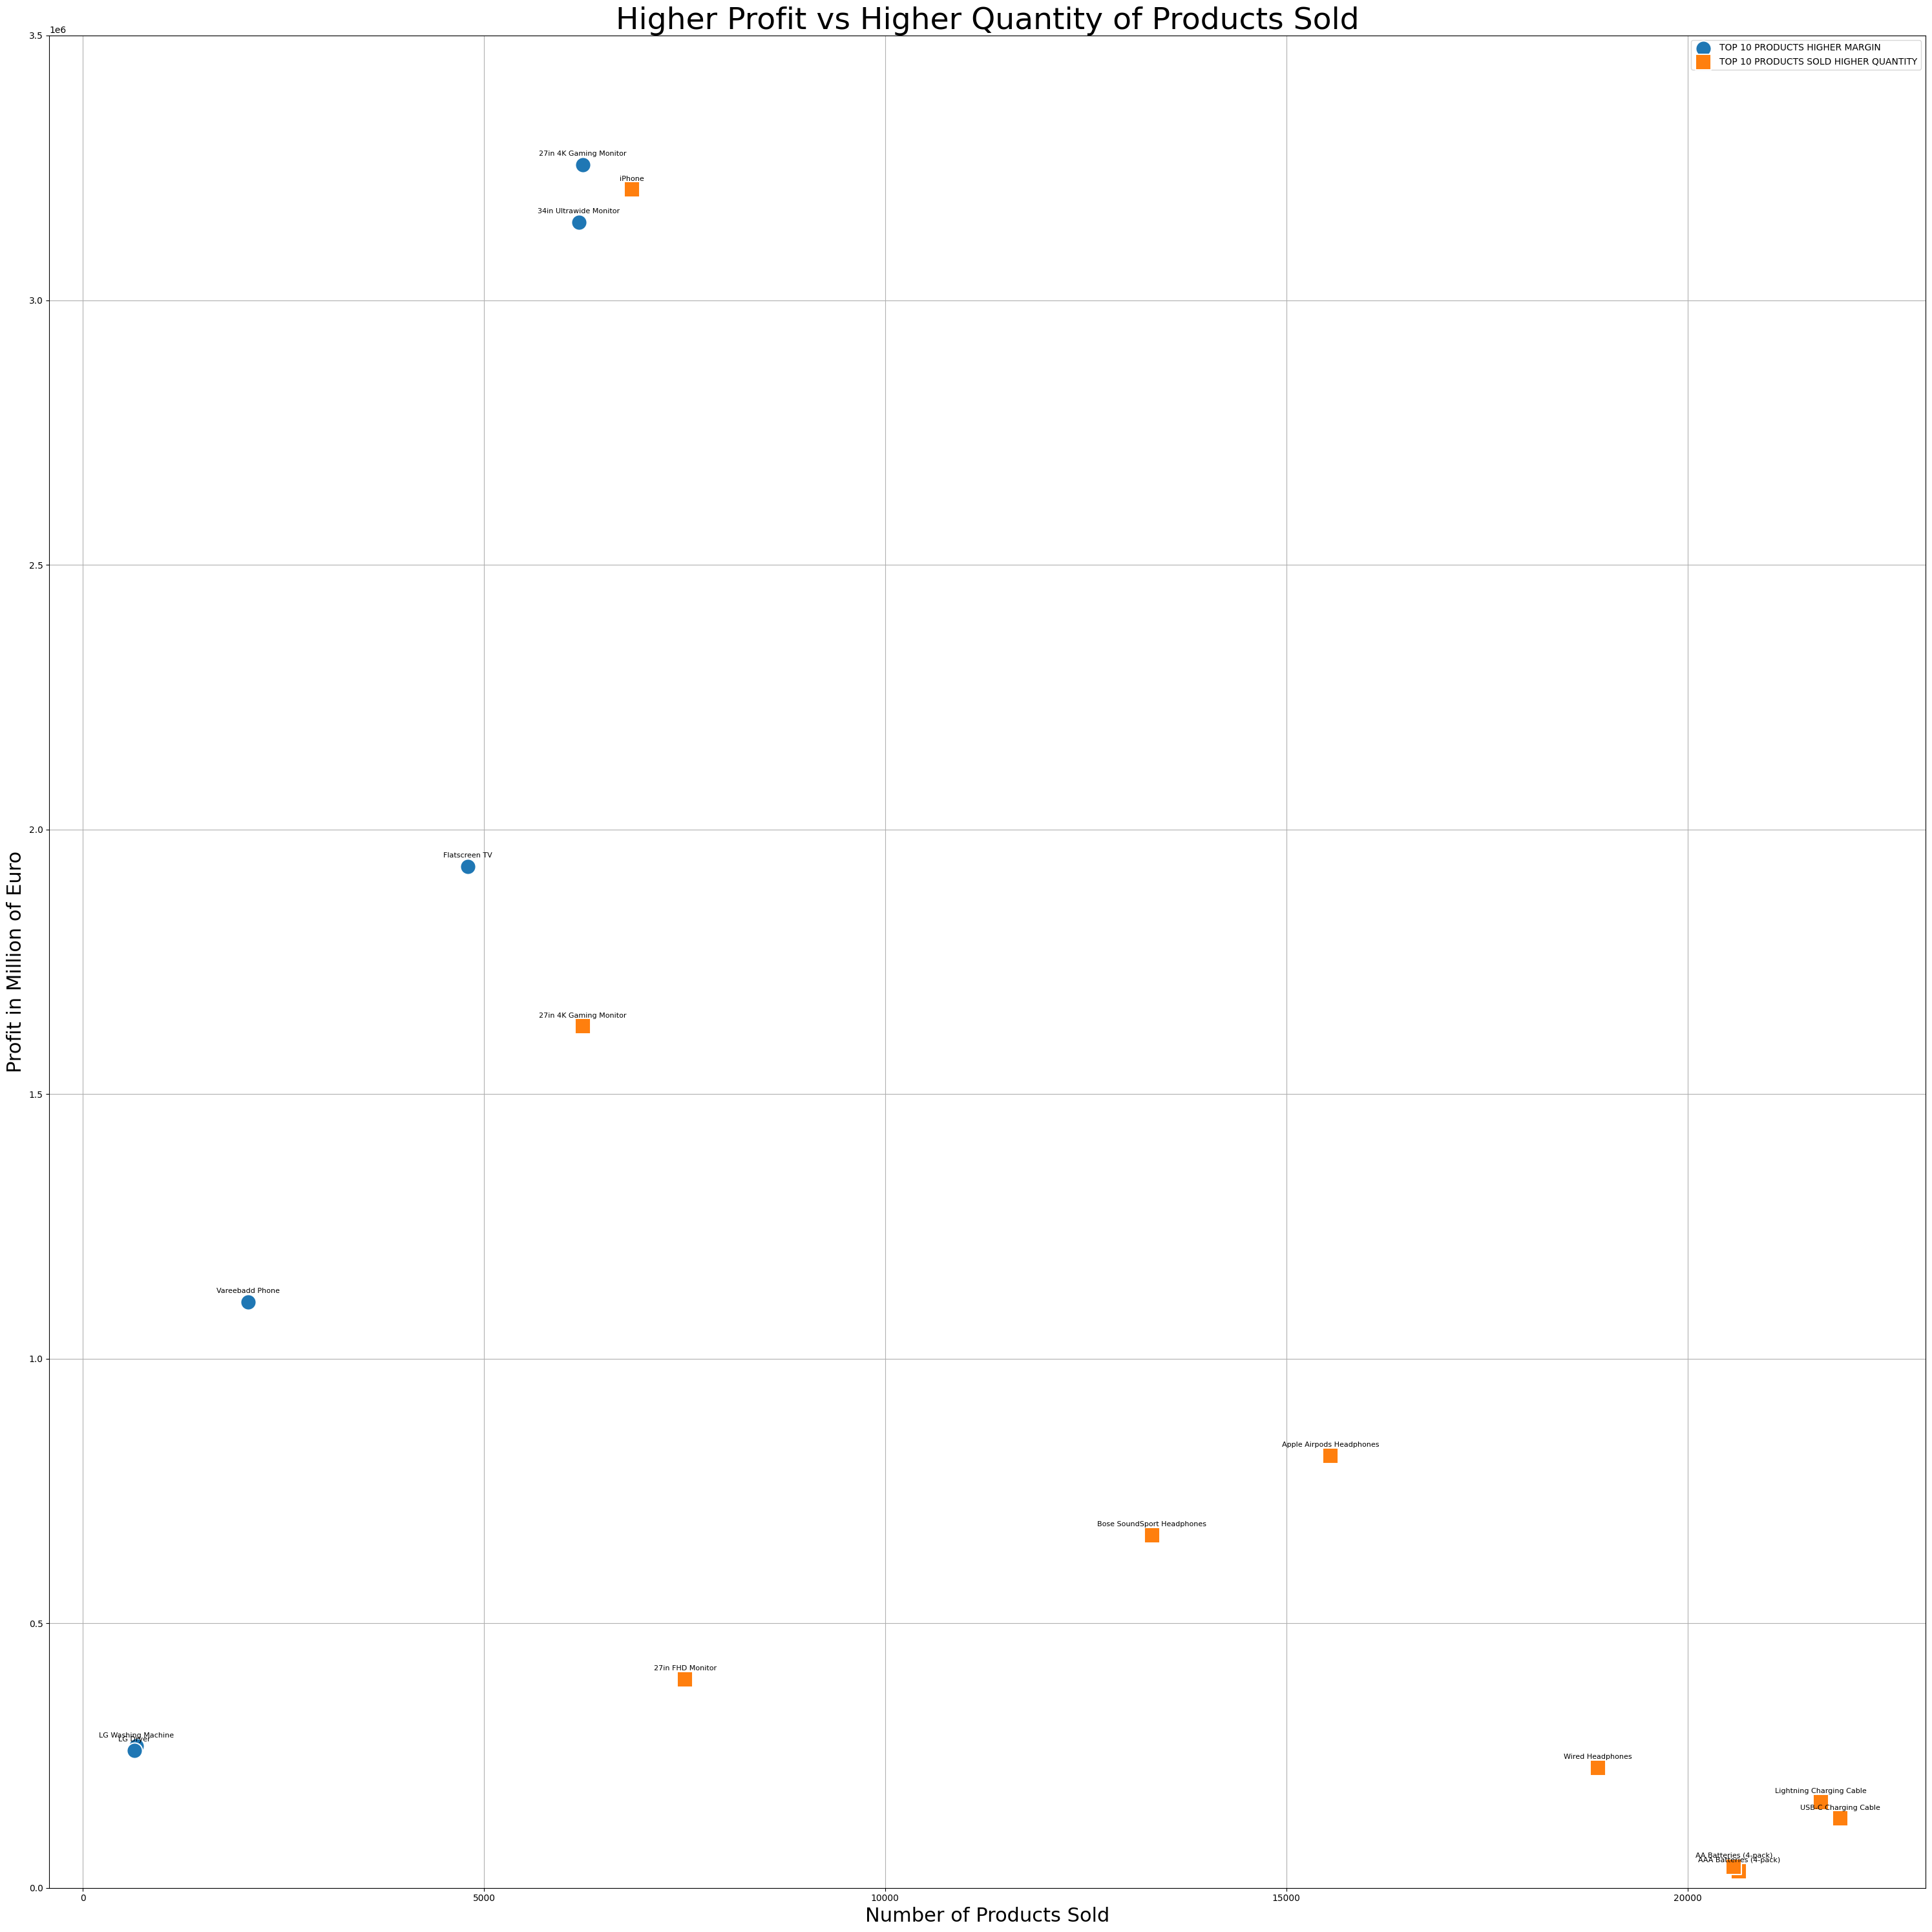

In [12]:
#Data Visualization SCATTERPLOT of Higher Profit Products vs Higher Quantity of Products Sold

df1 = Top10_Products_By_Margin_with_counts
df2 = top_10_products_sold_by_number
df1 = df1[["Total Profit", "Number of Sold Product", "Product"]]
df2 = df2[["Total Profit", "Total Number of Products Sold", "Product"]]

plt.figure(figsize=(30, 30))  
plt.ylim(0, 3500000)

sns.scatterplot(x="Number of Sold Product", y="Total Profit", data=df1, label="TOP 10 PRODUCTS HIGHER MARGIN", marker='o', s=300)
for i, row in df1.iterrows():
    plt.annotate(row["Product"], (row["Number of Sold Product"], row["Total Profit"]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)
sns.scatterplot(x="Total Number of Products Sold", y="Total Profit", data=df2, label="TOP 10 PRODUCTS SOLD HIGHER QUANTITY", marker='s', s=300)
for i, row in df2.iterrows():
    plt.annotate(row["Product"], (row["Total Number of Products Sold"], row["Total Profit"]), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)

plt.title("Higher Profit vs Higher Quantity of Products Sold", fontsize=34)
plt.xlabel("Number of Products Sold", fontsize=22)
plt.ylabel("Profit in Million of Euro", fontsize=22)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
